# Text Classification
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a of spam classifier with **Naive Bayes method** for real world email messages
- learn the **training and testing phase** for Naive Bayes classifier  
- get an idea of the **precision-recall** tradeoff

In [10]:
# some basic imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# ham_train contains the occurrences of each word in ham emails. 1-by-N vector
ham_train = np.loadtxt('ham_train.csv', delimiter=',')
# spam_train contains the occurrences of each word in spam emails. 1-by-N vector
spam_train = np.loadtxt('spam_train.csv', delimiter=',')
# N is the size of vocabulary.
N = ham_train.shape[0]
# There 9034 ham emails and 3372 spam emails in the training samples
num_ham_train = 9034
num_spam_train = 3372
# Do smoothing
x = np.vstack([ham_train, spam_train]) + 1

# ham_test contains the occurences of each word in each ham test email. P-by-N vector, with P is number of ham test emails.
i,j,ham_test = np.loadtxt('ham_test.txt').T
i = i.astype(np.int)
j = j.astype(np.int)
ham_test_tight = scipy.sparse.coo_matrix((ham_test, (i - 1, j - 1)))
ham_test = scipy.sparse.csr_matrix((ham_test_tight.shape[0], ham_train.shape[0]))
ham_test[:, 0:ham_test_tight.shape[1]] = ham_test_tight
# spam_test contains the occurences of each word in each spam test email. Q-by-N vector, with Q is number of spam test emails.
i,j,spam_test = np.loadtxt('spam_test.txt').T
i = i.astype(np.int)
j = j.astype(np.int)
spam_test_tight = scipy.sparse.csr_matrix((spam_test, (i - 1, j - 1)))
spam_test = scipy.sparse.csr_matrix((spam_test_tight.shape[0], spam_train.shape[0]))
spam_test[:, 0:spam_test_tight.shape[1]] = spam_test_tight


## Now let's implement a ham/spam email classifier. Please refer to the PDF file for details

In [12]:
from likelihood import likelihood
# TODO
# Implement a ham/spam email classifier, and calculate the accuracy of your classifier

# Hint: you can directly do matrix multiply between scipy.sparse.coo_matrix and numpy.array.
# Specifically, you can use sparse_matrix * np_array to do this. Note that when you use "*" operator
# between numpy array, this is typically an elementwise multiply.

# begin answer

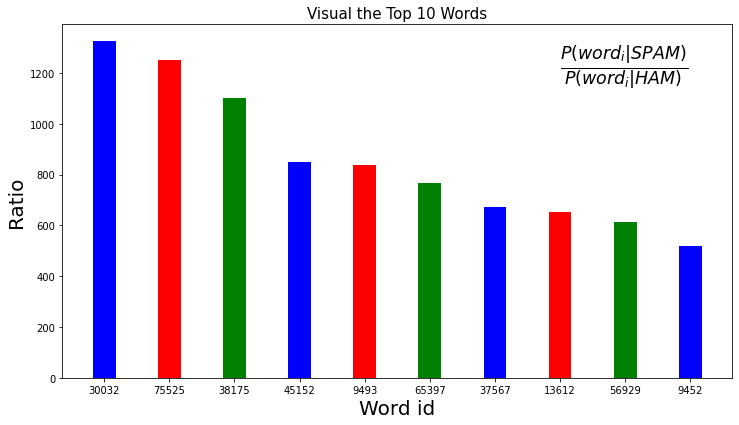

In [13]:
#start question (a)

import matplotlib.pyplot as plt
l = likelihood(x)
Ratio= np.zeros((1, l.shape[1]))
Ratio=l[1,:]/l[0,:]
ratio=list(Ratio.copy())
words=[]
p=[]
#find the top 10 ratio
for i in range(10):
    p.append(max(ratio))
    words.append(ratio.index(max(ratio)))
    ratio[ratio.index(max(ratio))]=-1 #delet if has been chosen
dic=dict(zip(p,words))
width = 0.35
plt.figure(figsize=(12, 6.5))
p1 = plt.bar([i for i in range(1,11)],p,width,color=['b', 'r', 'g'],tick_label=[dic[i] for i in p])
plt.xlabel('Word id',fontsize=20)
plt.ylabel('Ratio',fontsize=20)
plt.title('Visual the Top 10 Words',fontsize=15) 
plt.text(8,1200,r'$\frac{P(word_i|SPAM)}{P(word_i|HAM)}$',fontsize=25)
plt.show()

#end question (a)

In [19]:
#start question (b)

import time
total_num=spam_test.shape[0]+ham_test.shape[0]                      #compute the number of the test data
p_spam=1.0*num_spam_train/(num_ham_train+num_spam_train)            #P(spam)
p_ham=1.0*num_ham_train/(num_ham_train+num_spam_train)              #P(ham)
error_of_spamToham=0
error_of_hamTospam=0
start=time.time()
for i in spam_test:
    p_i=np.log(p_spam/p_ham*np.prod(np.power(Ratio,i.toarray())))   #to classify every spam email
    if p_i<0:error_of_spamToham+=1                                  #record the wrong sample spam To ham
for j in ham_test:
    p_j=np.log(p_spam/p_ham*np.prod(np.power(Ratio,j.toarray())))   #to classify every ham email
    if p_j>0: error_of_hamTospam+=1                                 #record the wrong sample ham To spam
accuracy=float(1-(error_of_spamToham+error_of_hamTospam)/total_num) #calculate the overall accuracy
end=time.time()
print(f'Error_of_spamToham : {error_of_spamToham}')
print(f'Error_of_hamTospam : {error_of_hamTospam}')
print(f'The total accuracy : {accuracy*100:.6f}%')
print(f'The time cost      : {end-start:.2f}s')

#end question (b)   

Error_of_spamToham : 31
Error_of_hamTospam : 28
The total accuracy : 98.573156%
The time cost      : 2.17s


In [20]:
#start question (d)

FN=error_of_spamToham
TP=spam_test.shape[0]-FN

FP=error_of_hamTospam
TN=ham_test.shape[0]-FP

Precision=TP/(TP+FP)
Recall=TP/(TP+FN)

print(f'Precision = {Precision*100:.6f}%')
print(f'Recall    = {Recall*100:.6f}%')

#end question (d)

#end answer

Precision = 97.502230%
Recall    = 97.241993%
